# Activity 4: Linear Algebra and Linear Systems

In this activity we'll learn how python can help with managing linear systems of equations. We'll learn how to set up systems of equations in python and translate them into linear transformations.

First let's look at manipulating matrices with python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#
# create a 3x3 matrix using numpy. The input is a list of lists
#

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

To create a matrix use the np.array constructor, but this time the argument is a list of lists. The outer list holds the three rows, and each inner list is a single row. You can experiment with arrays easily to see how they behave:

In [2]:
A+1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [3]:
A*2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

Note that simple math with scalers operates on eacm of the elements of the array the same. You can also add arrays:

In [4]:
B=2*A # create a new matrix B that is 2 times A
B

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [5]:
A+B # add A and B

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

In [6]:
A*B # multiply A and B element by element

array([[  2,   8,  18],
       [ 32,  50,  72],
       [ 98, 128, 162]])

# The Scaler Product

There is a very useful operation between two vectors sometimes called the "dot" product, or "scaler" product. A dot product is computing by multiplying corresponding components of two individual vectors, and then calculating the sum of those products. Suppose $\vec{A}^{*}$ is a vector and $\vec{B}$ is a vector, like so

$$ \vec{A} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \ \ \vec{B} = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$$

The *dot* *product* of $\vec{A}$ and $\vec{B}$ would be:

$$ \sum A_i B_i = 1\times 4 + 2 \times 5 + 3 \times 6 = 32 $$

In python one can accomplish this by using the "matrix multiplication" operator `@` like so:

In [7]:
A = np.array([1,2,3])
B = np.array([4,5,6])

A@B

32

There is a related concept called a *linear* *transformation* where a vector is linearly transformed into another vector. A linear transformation involves using this same matrix multiplication operator to compute the dot product of the three row vectors that make up the linear transoformation with the original vector:

Suppose:

$$ A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} $$

and 

$$ \vec{B} = \begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix} $$

Then you can compute the linear transformation of $\vec{B}$ by $A$ as the vector whose components are the dot products of the rows of $A$ with $\vec{B}$

Let $\vec{C}$ be the linear transformation:

$$ \vec{C} = A \vec{B} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} \begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix}$$

$$ \vec{C} = \begin{bmatrix} 1\times 2 + 2\times 3 + 3 \times 4 \\ 4 \times 2 + 5 \times 3 + 6\times 4 \\ 7\times 2 + 8\times 3 + 9\times 4 \end{bmatrix} = \begin{bmatrix} 20 \\ 47 \\ 74 \end{bmatrix}$$



In [8]:
#
# It looks hard, but in python it's actually super easy:
#

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([2,3,4])
C = A@B
C

array([20, 47, 74])

Another way to *think* of it is the linear combination, or superposition, of the columns of $A$ using the components of $\vec{B}$ as the coefficients:

$$\vec{C} = \begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} \times 2 +  \begin{bmatrix} 2 \\ 5 \\ 8 \end{bmatrix} \times 3 + \begin{bmatrix} 3 \\ 6 \\ 9 \end{bmatrix} \times 4 =  \begin{bmatrix} 20 \\ 47 \\ 74 \end{bmatrix}$$

As you can see you get the same result either way.



# Systems of Equations again

Recall when we studied systems of linear equations like these:

\begin{align}
a + b + c & = & 2\\
-a + c & = & 8\\
-a + b - c & = & -3
\end{align}

We can now see that these are really just a linear transformation. The matrix $A$

$$ A = \begin{bmatrix} 1 & 1 & 1 \\ -1 & 0 & 1 \\ -1 & 1 & -1 \end{bmatrix} $$

transforms the unknown vector $\vec{B}$:

$$ \vec{B} = \begin{bmatrix} a \\ b \\ c \end{bmatrix} $$

Into the known vector $\vec{C}$:

$$ \vec{C} = \begin{bmatrix} 2 \\ 8 \\ -3 \end{bmatrix} $$

$$ \vec{C} = A \vec{B} = \begin{bmatrix} 1 & 1 & 1 \\ -1 & 0 & 1 \\ -1 & 1 & -1 \end{bmatrix} \begin{bmatrix} a \\ b \\ c \end{bmatrix} = \begin{bmatrix} 2 \\ 8 \\ -3 \end{bmatrix} $$

If I gave you an algebraic problem:

$ C = A B $ where $A$ and $C$ were known, and $B$ was unknown, how would you solve it? You'd just divide both sides by $A$, right?

You'd just write $ B = C/A $. However, since $A$ is a *matrix* you can'd just divide. You need a concept called the *inverse* of the $\text{\it matrix}^*$. We need to find a matrix $A^{-1}$ with the property that $A A^{-1} = A^{-1} A = I$ Where $I$ is the *indentity* *matrix*, or *identity* *transformation*. The identity is a transformation that transforms a vector into *itself*.

There are ways to find the inverse of a matrix manually, but the good news is that numpy can compute inverses easily!

$^*$ Important Note: To actually compute the inverse of a square matrix (which we'll be letting the computer do for us in this class) one must compute something called the *determinant* of the matrix. One can show that if you start with a finite volume multidimensional figure in an n-D space, and then transform it with a matrix/linear transformation, the n-volume of the transformed figure is original volume times the determinant of the transformation. If this factor is zero, it means that the volume has gotten squished to zero! This means that two of the vectors making up the original volume now must point in the same direction. This means that the transformation cannot be inverted. Since to independent vectors (pointing in different directions) now point in the *same* direction. Also, the determinant shows up in the *denominator* of the expression for the matrix inverse. If the determinant is zero, it means the inverse is undefined, at best. This will be an important fact later on!

In [15]:
A = np.array([[ 1 , 1 , 1],[-1 , 0 , 1],[-1 , 1 , -1]])
C = np.array([2,8,-3])
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.25, -0.5 , -0.25],
       [ 0.5 ,  0.  ,  0.5 ],
       [ 0.25,  0.5 , -0.25]])

In [16]:
# Check that Ainv is the inverse of A

Ainv@A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Bingo! The identity matrix! Note that the dot product of the nth row of the identity matrix is just the nth component of the input vector, so the output vector is always the same as in the input vector.

Now, let's use the inverse to solve for $B = [a, b, c]$:

In [17]:
# solve for B

B = Ainv@C
print("B=", B)

# now check that B is the solution

print("A@B=", A@B)


B= [-2.75 -0.5   5.25]
A@B= [ 2.  8. -3.]


Perfect! That worked.



# What does this have to do with differential equations?

The magic of vectors and matrices is that you can reason about systems of equations in a way that's similar to thinking about  simple algebraic equations. We can *apply* this ability in cases where we have systems of differential equations in a similar way. What's the simplest first order differential equation we've encountered? Probably this one:

$$ \frac{dy}{dt} = A y $$

This equation as a simple solution:

$$ y(t) = y_0 e^{A t} $$

where $y(0) = y_0$.

What if now, instead of $y$ being a simple *number* we let $y(t)$ be a *vector* of values?

$$ \vec{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

Then we could have:

$$ \frac{d \vec{y}}{dt} = \begin{bmatrix} d y_1/dt \\ d y_2/dt \\ \vdots \\ d y_n/dt \end{bmatrix}=  A \vec{y} = A \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

But what kind of thing would $A$ have to be? It would have to multiply the vector $\vec{y}$ and produce a new vector $\frac{d \vec{y}}{dt}$. Do we know of anything we can multiply by takes a vector as an input and produces another vector as an output? Yes! Of course, it's a *linear* *transformation*!

# Example: Mass + spring with damping

In activities 2 and 3 we encountered the mass-spring system

1) (definition of $v$)

$$ \frac{dx}{dt} = v $$ 

2) Since the spring force is $F=-kx$, but $F = ma = m dv/dt \rightarrow a = -k x/m$ but $a=dv/dt$ so that means:

$$ \frac{dv}{dt} = -k x/m $$

We can add a simple proportional damping term like so:

$$ \frac{dv}{dt} = -k x/m - b v/m $$

We can think of $x$ and $v$ as two components of the system "state", $y$.

$$ \vec{y} = \begin{bmatrix} x \\ v\end{bmatrix} $$

$$ \frac{d \vec{y}}{dt} = \begin{bmatrix} dx/dt \\ dv/dt \end{bmatrix}=  A \vec{y} = A \begin{bmatrix} x \\ v\end{bmatrix} $$

Then, using the relationships above for the mass-spring system, let's infer $A$.

Since $ dx/dt = v $ it means the top *row* of $A$ must be `[ 0 1 ]`. And since $dv/dt = -k x/m - b v/m $ it means the bottom *row* of $A$ must be `[ -k/m -b/m]`, or:

$$ \frac{d \vec{y}}{dt} = \begin{bmatrix} dx/dt \\ dv/dt \end{bmatrix}=  \begin{bmatrix} 0 & 1 \\ -k/m & -b/m \end{bmatrix} \begin{bmatrix} x \\ v\end{bmatrix} $$

Let's explore this system numerically assuming $m=2{\rm kg}$, $k=10{\rm N/kg}$, and $b=2{\rm Ns/m}$ assuming $x(0) = 1$ and $v(0) = 0$.






Text(0.5, 1.0, 'Mass-Spring System')

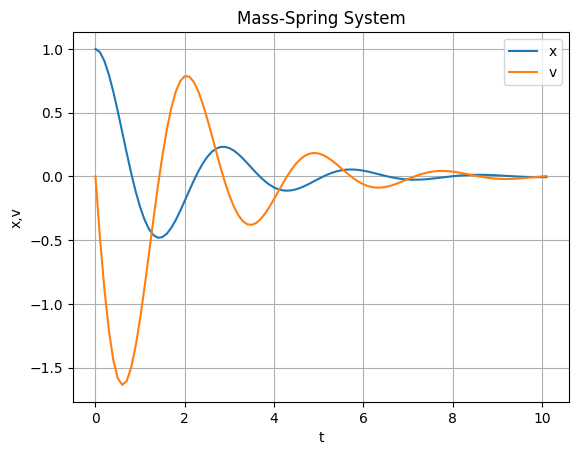

In [12]:
m = 2
k = 10
b = 2

x0 = 1
v0 = 0

A = np.array([[0,1],[-k/m,-b/m]])  # define the matrix A

def derivs(y,t):
    return A@y  # note that our derivs function is just a simple matrix multiply!

y0 = np.array([x0,v0])

def HeunStep(f,y,t,dt):
    k1 = f(y,t)
    k2 = f(y+k1*dt,t+dt)
    return y + (k1+k2)*dt/2

t = 0
dt = 0.1
y = y0

tlist = [t]
xlist = [y[0]]
vlist = [y[1]]

while t<10:
    y = HeunStep(derivs,y,t,dt)
    t = t + dt
    xlist.append(y[0])
    vlist.append(y[1])
    tlist.append(t)

plt.plot(tlist,xlist,label='x')
plt.plot(tlist,vlist,label='v')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('x,v')
plt.title('Mass-Spring System')


# Now it's your turn!

## Radioactive Decay System

Here's another system that can be expressed as a linear system of equations.

Suppose you have a radioactive source with a concentration $c_1$ that decays with time according to:

$$ \frac{dc_1}{dt} = - \lambda_1 c_1 $$

It decays into a "daughter" element with a concentration $c_2$, but this material is also radioactive, so it also decays with a rate $\lambda_2$ according to:

$$ \frac{dc_2}{dt} = + \lambda_1 c_1  - \lambda_2 c_2$$

Note that $c_2$ is increasing from decays of $c_1$, but decreasing due to its own decay process.

Let's assume $c_2$ decays into a stable isotope with concentration $c_3$:

$$ \frac{dc_3}{dt} = + \lambda_2 c_2 $$

so the triple: $c_1, c_2, c_3$ is a system:

$$ \frac{d \vec{y}}{dt} = \begin{bmatrix} dc_1/dt \\ dc_2/dt \\ dc_3/dt \end{bmatrix}=  A \begin{bmatrix} c_1 \\ c_2 \\ c_3\end{bmatrix} $$

## Questions

1. Convert this sytem of equations into a linear transformation of $\vec{y}$ onto $d\vec{y}/dt$. What is the matrix $A$? Explain your reasoning.
2. Use the Heun method to explore the solutions for $c_1(t), c_2(t), c_3(t)$. Assume $[c_1, c_2, c_3]$ starts out as an array: `[1, 0, 0]`. Assume $\lambda_1 = 2$ per year and $\lambda_2 = 1$ per year. Use time units of years.
3. Estimate is the maximum concentration $c_2(t)$. Estimate the time when this maximum occurs.

You can check your results by comparing to this output:

![graph of expected output](images/act4-soln.png)

